
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [3]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Load libraries
import pandas as pd 
import seaborn as sns 
import matplotlib  
from matplotlib import pyplot as plt 
import pylab 
import pingouin as pg
import numpy as np
from scipy.stats import norm #used to plot theoretical normal distribution
from scipy.stats import shapiro #used for Shapiro test
from scipy.stats import pearsonr #used for pearso

# Read the CSV file into a DataFrame
df_mh = pd.read_csv('/Users/gillian/Downloads/A1_analysing_data/data for A1/MillerHadenData.csv')

In [30]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
print(min(df_mh['Abil']), max(df_mh['Abil']), sorted(df_mh['Abil'].unique()))

print(min(df_mh['IQ']), max(df_mh['IQ']), sorted(df_mh['IQ'].unique()))

#Clearly the data for both Ability and IQ is interval. This is evident from the fact that there is no zero point, additionally the intervals between the unique values seem to be consistent. 


   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
45 67 [45, 48, 49, 50, 51, 52, 54, 55, 56, 57, 61, 62, 66, 67]
81 118 [81, 82, 92, 94, 95, 96, 98, 99, 100, 101, 103, 104, 105, 107, 109, 114, 117, 118]


In [31]:
# Q1b (code):
# Check for missing values in IQ and Reading Ability
print("Missing values in IQ:", df_mh['IQ'].isnull().sum())  #https://miamioh.edu/centers-institutes/center-for-analytics-data-science/students/coding-tutorials/python/data-cleaning.html
print("Missing values in Reading Ability:", df_mh['Abil'].isnull().sum())

# Check whether there is a data point for each participant on both variables
print("Rows with any missing values:", df_mh.isnull().any(axis=1).sum())  #https://datatofish.com/rows-with-nan-pandas-dataframe/

Missing values in IQ: 0
Missing values in Reading Ability: 0
Rows with any missing values: 0


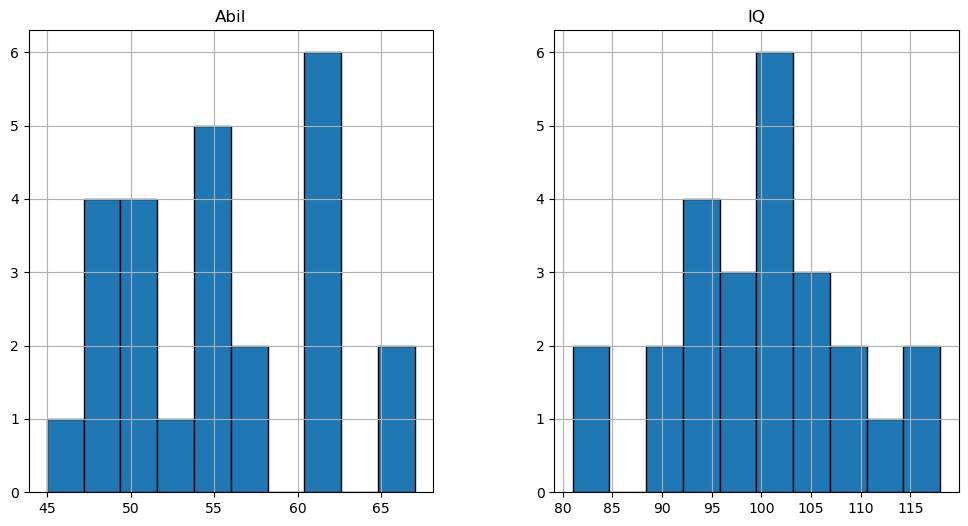

ShapiroResult(statistic=0.9487950205802917, pvalue=0.2354886382818222)
ShapiroResult(statistic=0.9636043310165405, pvalue=0.4908201992511749)


In [32]:
# Q1c (code):
# Check data distribution
from scipy.stats import shapiro

# Plot histogram for Reading Ability and IQ
df_mh[['Abil', 'IQ']].hist(bins=10, edgecolor='k', figsize=(12, 6)) #https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/
plt.show()



# Since both variables are interval data, it is appropriate to use the Shapiro-Wilk test to test the null hypothesis of whether the data is normally distributed。

# Perform Shapiro-Wilk test
print(shapiro(df_mh['Abil'])) #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
print(shapiro(df_mh['IQ']))

# Both p-values are above 0.05 or 0.1 meaning we fail to reject the null hypothesis for both variables that the data is normally distributed on the 5% and 10% significance level


Text(0, 0.5, 'IQ')

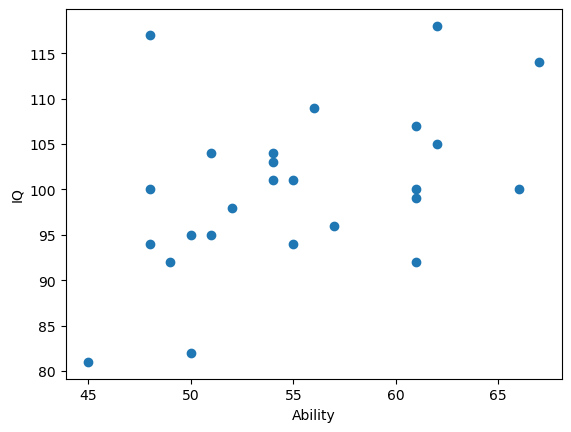

In [33]:
# Q1d (code):
# Scatter plot
plt.scatter(df_mh['Abil'],df_mh['IQ']) #https://www.w3schools.com/python/python_ml_scatterplot.asp
plt.xlabel('Ability')
plt.ylabel('IQ')

Text(0, 0.5, 'IQ')

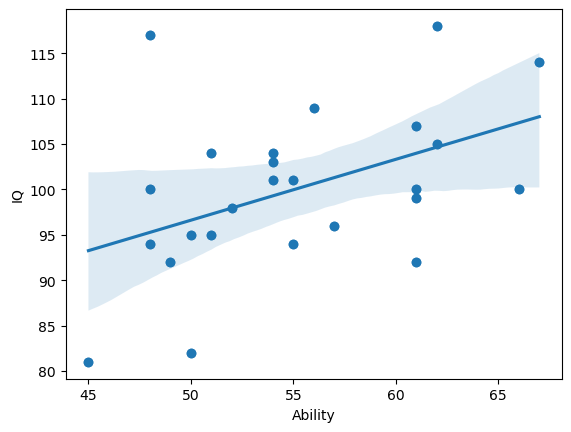

In [34]:
# Q1e (code):
# Correlation line
plt.scatter(df_mh['Abil'],df_mh['IQ'])
sns.regplot(x='Abil', y='IQ', data=df_mh) #https://www.statology.org/scatterplot-with-regression-line-python/
plt.xlabel('Ability')
plt.ylabel('IQ')

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [35]:
# Q2a (answer with words):
# Since we failed to reject the null hypothesis that the data is normally distributed this suggests that the data could be normal
# Furthermore the correlation seems to be linear from the correlation plot
# Hence, Pearson correlation coefficient test seems the most appropriate. But since Spearman is non-parametric this one can also be used


In [36]:
# Q2b (code):
# Conduct the correlation coefficient test using pingouin

print(pearsonr(df_mh['Abil'], df_mh['IQ'])) #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html



PearsonRResult(statistic=0.45116993876507616, pvalue=0.02359260883361457)


In [37]:
# Q2c (answer with words):

# We have a p-value of 0.0236 hence we reject the null hypothesis that there is no assocation with both variables at the 5% significance level.
# This suggests that there is correlation between both variables.
# Furthermore the coefficient is 0.44 and positive suggest that an increased IQ is associated with an increased reading ability.


## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [38]:
# Q3a (answer in words):
# H0: Reading time at home and the reading ability are independent from eachother
# H1：Reading time at home and reading ability are not independent

In [39]:
# Q3b (code):
# Calculate the rounded average of Reading Ability and Home
avg_abil = round(df_mh['Abil'].mean())
avg_home = round(df_mh['Home'].mean())

# # Create the Rank_Abil column
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x: 'Low' if x <= avg_abil else 'High') #https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/

# # Create the Rank_Home column
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'Low' if x <= avg_home else 'High')

# Display the first few rows to verify
print(df_mh.head())

   Participant  Abil   IQ  Home   TV Rank_Abil Rank_Home
0            1    61  107   144  487      High      High
1            2    56  109   123  608      High       Low
2            3    45   81   108  640       Low       Low
3            4    66  100   155  493      High      High
4            5    49   92   103  636       Low       Low


In [40]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])
print("Contingency Matrix:")
print(contingency_matrix)

Contingency Matrix:
Rank_Home  High  Low
Rank_Abil           
High          8    2
Low           3   12


In [41]:
# Q3d (code):
# Perform the Chi-square test
from scipy.stats import chi2_contingency
print(chi2_contingency(contingency_matrix))


Chi2ContingencyResult(statistic=6.500270562770561, pvalue=0.010785807794066234, dof=1, expected_freq=array([[4.4, 5.6],
       [6.6, 8.4]]))


In [42]:
# Q3e (answer in words):
#The Chi-square test results in a p-value of 0.011, hence we reject the null hypothesis under the 5% significance level. 
#Concluding that there is a significant correlation between reading ability and the time you read at home.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [43]:
# Import necessary libraries
from scipy import stats  # used for statistical tests
import numpy as np  # used for numerical operations

# Load the data
df_evaluators = pd.read_csv('/Users/gillian/Downloads/A1_analysing_data/data for A1/evaluators.csv')

# Display the first few rows of the dataframe
print(df_evaluators.head())


   eval_id condition   age  sex
0        1  listened  29.0  2.0
1        2  listened  27.0  2.0
2        3  listened  27.0  2.0
3        4      read  40.0  2.0
4        5      read  32.0  2.0


In [44]:
# Q4a (code):
# Calculate mean and standard deviation for age

mean = df_evaluators['age'].mean()
std = df_evaluators['age'].std()
print(mean)
print(std)

30.852941176470587
6.238358141327351


In [45]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents men and 2 represents women
print(np.unique(df_evaluators['sex'], return_counts = True))

#Thus, 4 men and 30 women. 

(array([ 1.,  2., nan]), array([ 4, 30,  5]))


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [46]:
# Load ratings data
df_ratings = pd.read_csv('/Users/gillian/Downloads/A1_analysing_data/data for A1/ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [47]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories

df_filtered = df_ratings[(df_ratings['Category']=='competent') | (df_ratings['Category']== 'thoughtful') | (df_ratings['Category'] == 'intelligent')] #https://stackoverflow.com/questions/43238504/how-to-subset-a-pandas-dataframe-based-on-a-condtion-of-a-categorical-variable
df_filtered.head()

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame

mean_rating_per_eval = df_filtered.groupby('eval_id')['Rating'].mean()#https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/
mean_rating_per_eval = mean_rating_per_eval.reset_index() #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html


# Add a 'Category' column with the value 'intellect' for these rows
mean_rating_per_eval['Category'] = 'intellect'



# Create a DataFrame for 'impression' and 'hire' ratings

df_impression  = df_ratings[(df_ratings['Category']== 'impression')]
df_hire = df_ratings[(df_ratings['Category']=='hire')]

mean_hire = df_hire.groupby('eval_id')['Rating'].mean()
mean_hire = mean_hire.reset_index()
mean_hire['Category'] = 'hire'

mean_impression = df_impression.groupby('eval_id')['Rating'].mean()
mean_impression = mean_impression.reset_index()
mean_impression['Category'] = 'impression'



# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame

ratings2 = pd.concat([mean_rating_per_eval, mean_hire, mean_impression], ignore_index=True) #https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/






# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column

ratings2 = ratings2.merge(df_evaluators[['eval_id', 'condition']], on='eval_id', how='left') #https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/


# Select only the necessary columns as per the structure required


                                        
# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category']) #https://www.freecodecamp.org/news/how-to-sort-values-in-pandas/



# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Rating,Category,condition
39,1,6.000000,hire,listened
78,1,7.000000,impression,listened
0,1,6.000000,intellect,listened
40,2,4.000000,hire,listened
79,2,4.666667,impression,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [48]:
# Q6a (answer in words):
# Null hypothesis: (H0:μ1=μ2) There is no significant difference between overall ratings between reading or listening to a resume 

# Alternative hypothesis:(H1:μ1/=μ2) There is a significant difference between overall ratings


# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

In [49]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
# Since we are interested in the whether the there is a difference or not rather than the direction of the difference, a two-tail is appropriate


In [50]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?

# Here the dependent variable is the overall rating and the independent variable is the way of receiving the resume



To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [51]:
###Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for ...

# Descriptive analysis of the ratings

ratings2_intellect = ratings2[ratings2['Category'] =='intellect']
ratings2_hire = ratings2[ratings2['Category'] == 'hire']
ratings2_impression = ratings2[ratings2['Category'] == 'impression']
ratings2_impression.head()

mean1 = ratings2_intellect.loc[ratings2_intellect['condition'] == 'listened', 'Rating'].mean() #https://www.geeksforgeeks.org/python-pandas-dataframe-loc/
std1 = ratings2_intellect.loc[ratings2_intellect['condition'] == 'listened', 'Rating'].std()
mean2 = ratings2_intellect.loc[ratings2_intellect['condition'] == 'read', 'Rating'].mean()
std2 = ratings2_intellect.loc[ratings2_intellect['condition'] == 'read', 'Rating'].std()

print("Descriptive Analysis Intellect")
print(pd.DataFrame({
    'Ratings': ['Mean', 'Standard Deviation'],
    'listened': [mean1, std1],
    'read': [mean2, std2]
}))
print("\n")


mean1 = ratings2_impression.loc[ratings2_impression['condition'] == 'listened', 'Rating'].mean()
std1 = ratings2_impression.loc[ratings2_impression['condition'] == 'listened', 'Rating'].std()
mean2 = ratings2_impression.loc[ratings2_impression['condition'] == 'read', 'Rating'].mean()
std2 = ratings2_impression.loc[ratings2_impression['condition'] == 'read', 'Rating'].std()

print("Descriptive Analysis Impression")
print(pd.DataFrame({
    'Ratings': ['Mean', 'Standard Deviation'],
    'listened': [mean1, std1],
    'read': [mean2, std2]
}))
print("\n")



mean1 = ratings2_hire.loc[ratings2_hire['condition'] == 'listened', 'Rating'].mean()
std1 = ratings2_hire.loc[ratings2_hire['condition'] == 'listened', 'Rating'].std()
mean2 = ratings2_hire.loc[ratings2_hire['condition'] == 'read', 'Rating'].mean()
std2 = ratings2_hire.loc[ratings2_hire['condition'] == 'read', 'Rating'].std()

print("Descriptive Analysis Hire")
print(pd.DataFrame({
    'Ratings': ['Mean', 'Standard Deviation'],
    'listened': [mean1, std1],
    'read': [mean2, std2]
}))
print("\n")




# Test for normal distribution (Shapiro-Wilk test)


print("Shapiro-Wilk test for Intellect ")
print(shapiro(ratings2_intellect.loc[ratings2_intellect['condition'] == 'listened', 'Rating'])) 
print(shapiro(ratings2_intellect.loc[ratings2_intellect['condition'] == 'read', 'Rating']))
print("\n")



print("Shapiro-Wilk test for Impression")
print(shapiro(ratings2_impression.loc[ratings2_impression['condition'] == 'listened', 'Rating'])) 
print(shapiro(ratings2_impression.loc[ratings2_impression['condition'] == 'read', 'Rating']))
print("\n")


print("Shapiro-Wilk test for Hire")
print(shapiro(ratings2_hire.loc[ratings2_hire['condition'] == 'listened', 'Rating'])) 
print(shapiro(ratings2_hire.loc[ratings2_hire['condition'] == 'read', 'Rating']))
print("\n")



# Test for homogeneity of variances (Levene's test)

print("Levene test for Intellect")
print(levene(ratings2_intellect.loc[ratings2_intellect['condition'] == 'listened', 'Rating'], ratings2_intellect.loc[ratings2_intellect['condition'] == 'read', 'Rating'])) #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
print("\n")

print("Levene test for Impression")
print(levene(ratings2_impression.loc[ratings2_impression['condition'] == 'listened', 'Rating'], ratings2_impression.loc[ratings2_impression['condition'] == 'read', 'Rating']))
print("\n")

print("Levene test for hire")
print(levene(ratings2_hire.loc[ratings2_hire['condition'] == 'listened', 'Rating'], ratings2_hire.loc[ratings2_hire['condition'] == 'read', 'Rating']))
print("\n")

# Independent t-tests

print("T-test for Intellect")
print(ttest_ind(ratings2_intellect.loc[ratings2_intellect['condition'] == 'listened', 'Rating'], ratings2_intellect.loc[ratings2_intellect['condition'] == 'read', 'Rating']))
print("\n")

print("T-test for Impression")
print(ttest_ind(ratings2_impression.loc[ratings2_impression['condition'] == 'listened', 'Rating'], ratings2_impression.loc[ratings2_impression['condition'] == 'read', 'Rating']))
print("\n")

print("T-test for Hire")
print(ttest_ind(ratings2_hire.loc[ratings2_hire['condition'] == 'listened', 'Rating'], ratings2_hire.loc[ratings2_hire['condition'] == 'read', 'Rating']))
print("\n")


#ratings_desc, shapiro_results, levene_results, ttest_results

Descriptive Analysis Intellect
              Ratings  listened      read
0                Mean  5.634921  3.648148
1  Standard Deviation  1.608674  1.911343


Descriptive Analysis Impression
              Ratings  listened      read
0                Mean  5.968254  4.074074
1  Standard Deviation  1.917477  2.233306


Descriptive Analysis Hire
              Ratings  listened      read
0                Mean  4.714286  2.888889
1  Standard Deviation  2.261479  2.054805


Shapiro-Wilk test for Intellect 
ShapiroResult(statistic=0.9350408315658569, pvalue=0.17365092039108276)
ShapiroResult(statistic=0.9512398838996887, pvalue=0.4447984993457794)


Shapiro-Wilk test for Impression
ShapiroResult(statistic=0.9394756555557251, pvalue=0.21276134252548218)
ShapiroResult(statistic=0.9483762383460999, pvalue=0.40011659264564514)


Shapiro-Wilk test for Hire
ShapiroResult(statistic=0.9390669465065002, pvalue=0.20883114635944366)
ShapiroResult(statistic=0.9034498333930969, pvalue=0.06600641459226608)

In [52]:
#Q7b (answer in words):

In [53]:
# From the descriptive analysis we can already prematurely see that the means between reading or listened to an applicant's resume have a big difference.
# While the standard deviations seem to be roughly equal

# Firstly, since we want to perform t-tests to compare the sample means of between reading and listening for the Category Intellect, Impression and Hire.
# We need to make sure that the samples of each of these are normal, since perfoming a t-test works under the assumption that the data of which the means are compared are both normally distributed.
# Thus since we perform the t-test 3 times, we need that the sub samples of reading or listening for the category Intellect, Impression and Hire should be normally distributed
# Hence, we perform a Shapiro-Wilks test for every subsample and we see that we fail to reject the null hypothesis of normality under the 5% significance level for all 6 sub samples.

# The second assumption of the t-test is that both samples have the same variance. 
# In order to test this we use the Levene test to test the homogeinity of the variances.
# Again we fail to reject the null hypothesis under the 5% and 10% significance level for all categories.

# Since we fail to find evidence against the assumptions of the t-tests. We continue to perform them.
# Here we see that the p-values are all below 0.05 and even below 0.01 for Intellect and Impression,
# Meaning we reject the null hypothesis stating that the means among listening and reading are the same under the 5% significance level across all categories.
# Showing that the evaluators response differently to reading or listening to a resume.
